In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import hamming

from sklearn.decomposition import PCA ## Principled Components Analysis

import re
import os

In [2]:
## Reading in the datasets

In [2]:
## Full dataset
df = pd.read_csv('birds_reduced.csv')
df

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats
0,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (adult),"['Brown', 'Cream/buff', 'Grey', 'Orange', 'Red...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
1,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (juvenile),"['Brown', 'Cream/buff', 'Orange', 'White', 'Ye...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
2,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult male),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
3,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult female),"['Brown', 'Cream/buff', 'Grey']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
4,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (adult),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
5,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (juvenile),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
6,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (adult male),"['Black', 'Brown', 'White']",['Brown'],"['Black', 'Brown', 'Orange', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
7,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (juvenile),"['Black', 'Brown', 'Cream/buff', 'Orange', 'Wh...",['Brown'],"['Black', 'Brown', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
8,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (male),"['Black', 'Blue', 'Brown', 'Cream/buff', 'Gree...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."
9,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (female),"['Black', 'Brown', 'Cream/buff', 'Green', 'Gre...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."


In [3]:
## Training set
train = pd.read_csv('birds_training_set2.csv', index_col=['Unnamed: 0'])
train

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats
0,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (adult),"['Brown', 'Cream/buff', 'Grey', 'Orange', 'Red...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
1,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (juvenile),"['Brown', 'Cream/buff', 'Orange', 'White', 'Ye...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
2,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult male),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
3,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult female),"['Brown', 'Cream/buff', 'Grey']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
4,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (adult),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
5,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (juvenile),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
7,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (juvenile),"['Black', 'Brown', 'Cream/buff', 'Orange', 'Wh...",['Brown'],"['Black', 'Brown', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
8,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (male),"['Black', 'Blue', 'Brown', 'Cream/buff', 'Gree...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."
9,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (female),"['Black', 'Brown', 'Cream/buff', 'Green', 'Gre...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."
10,Blue tit,Cyanistes caeruleus,"Insects, caterpillars, seeds and nuts.",12cm,18cm,11g,"3,400,000 territories",15 million,Blue tit,"['Black', 'Blue', 'Green', 'Grey', 'White', 'Y...","['Blue', 'Grey']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"


In [4]:
## Separating X train from y train
X_train = train.drop(columns=['species']).copy()
y_train = train['species']

In [5]:
## Similar process with test dataset
test = pd.read_csv('birds_testing_set2.csv', index_col=['Unnamed: 0']) ## Reading in the testing set
test

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats
6,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (adult male),"['Black', 'Brown', 'White']",['Brown'],"['Black', 'Brown', 'Orange', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
18,Herring gull,Larus argentatus,"Ominivorous- carrion, offal, seeds, fruits, yo...",54-60cm,130-150cm,690-1440g,"130,000 pairs","740,000 birds",Herring gull,"['Black', 'Grey', 'White']",['Pink'],"['Red', 'Yellow']","['Medium length', 'Powerful', 'Chunky']","['Farmland', 'Grassland', 'Marine and intertid..."
23,Black-headed gull,Chroicocephalus ridibundus,"Worms, insects, fish and carrion.",34-37cm,100-110cm,200-400g,"140,000 pairs",2.2 million,Black-headed gull (first-winter plumage),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Orange']","['Black', 'Orange', 'Red']","['Medium length', 'Medium thickness']","['Farmland', 'Marine and intertidal', 'Urban a..."
12,Great tit,Parus major,"Insects, seeds and nuts.",14cm,24cm,18g,"2,350,000 territories",NaN,Great tit,"['Black', 'Blue', 'Cream/buff', 'Green', 'Grey...",['Grey'],['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"


In [6]:
## Separating X test and y test
X_test = test.drop(columns=['species']).copy()
y_test = test['species']

#### Feature engineering

In [8]:
## Copying helpful functions from my EDA workbook

In [7]:
def population_clean(string):
    try:
        clean = string.replace(',','') ## Removing commas
        clean = clean.split() ## Creating a list of the number and the unit

        clean[0] = float(clean[0]) ## Converting number to float
        if clean[1] == 'pairs' or clean[1] == 'territories': ## Multiplying number by two if unit is 'pair' or 'territories'
            clean[0] *= 2
        elif clean[1] == 'million': ## Multiplying number by one million if unit is 'million'
            clean[0] *= 10**6
        ## No need to do anything if unit is 'birds'

        clean = int(clean[0]) ## Keeping just the number. Might as well make it an integer as you can't have a fraction of birds

        return clean

    except AttributeError: ## Need try and except branch to work around the fact that np.NAN is a float and not a string
        pass

In [8]:
def measurement_avg(string):
    #avg = string.replace(r'\s?[cmg]+','') ## This works to remove either the gram and centimetre unit
    avg = re.sub('\s?[cmg]+','',string) ## This works to remove either the gram and centimetre unit
    avg = avg.split('-') ## Creates a list of the measurement values
    avg = [float(item) for item in avg] ## Converts elements of the list into numbers
    avg = np.mean(avg) ## Takes the mean of the list
    return avg

In [9]:
def variation_clean(string):
    if '(' not in string: ## If no brackets are present, the variation name is the same as the species name
        clean = 'adult'
    else:
        clean = string.split('(') ## Splitting the variation name where the specification occurs
        clean = clean[1].replace(')','') ## Keeping the variation name without the closing bracket

        if clean == 'male': ## Formatting the male/female variations. If there was a longer list, maybe a dictionary could have been used?
            clean = 'adult male'
        elif clean == 'female':
            clean = 'adult female'
        elif clean == 'first-winter plumage':
            clean = 'juvenile'
        elif clean == 'second-winter plumage':
            clean = 'juvenile'
        elif clean == 'summer plumage':
            clean = 'adult'
        elif clean == 'winter plumage':
            clean = 'adult'

    return clean

In [10]:
def size_estimator(length):
    if length <= 14: ## Lower quartile of training lengths
        return 'Small (<15cm)'
    elif length > 35: ## Upper quartile of training lengths
        return 'Large (>35cm)'
    else:
        return 'Medium (15-35cm)'

In [12]:
## Feather colours
def in_list_white(list):
    if 'White' in list:
        return 1
    else:
        return 0

def in_list_black(list):
    if 'Black' in list:
        return 1
    else:
        return 0

def in_list_brown(list):
    if 'Brown' in list:
        return 1
    else:
        return 0

def in_list_orange(list):
    if 'Orange' in list:
        return 1
    else:
        return 0

def in_list_pink_purple(list):
    if 'Pink/purple' or 'Pink' or 'Purple' in list:
        return 1
    else:
        return 0

def in_list_red(list):
    if 'Red' in list:
        return 1
    else:
        return 0

## Leg colours
## Brown, red, pink, orange already covered

def in_list_grey(list):
    if 'Grey' in list:
        return 1
    else:
        return 0

def in_list_blue(list):
    if 'Blue' in list:
        return 1
    else:
        return 0

## Beak colours
## Only need to cover yellow

def in_list_yellow(list):
    if 'Yellow' in list:
        return 1
    else:
        return 0

## Beak shape
def in_list_short(list):
    if 'Short' in list:
        return 1
    else:
        return 0

def in_list_med_length(list):
    if 'Medium length' in list:
        return 1
    else:
        return 0

def in_list_chunky(list):
    if 'Chunky' in list:
        return 1
    else:
        return 0

def in_list_thin(list):
    if 'Thin' in list:
        return 1
    else:
        return 0

def in_list_med_thick(list):
    if 'Medium thickness' in list:
        return 1
    else:
        return 0

def in_list_powerful(list):
    if 'Powerful' in list:
        return 1
    else:
        return 0

## Natural habitats
def in_list_farmland(list):
    if 'Farmland' in list:
        return 1
    else:
        return 0

def in_list_urban(list):
    if 'Urban and suburban' in list:
        return 1
    else:
        return 0

def in_list_woodland(list):
    if 'Woodland' in list:
        return 1
    else:
        return 0

def in_list_wetland(list):
    if 'Wetland' in list:
        return 1
    else:
        return 0

def in_list_heath(list):
    if 'Heathland' in list:
        return 1
    else:
        return 0

def in_list_upland(list):
    if 'Upland' in list:
        return 1
    else:
        return 0

In [13]:
def is_small(string):
    if 'Small' in string:
        return 1
    else:
        return 0

def is_medium(string):
    if 'Medium' in string:
        return 1
    else:
        return 0

def is_large(string):
    if 'Large' in string:
        return 1
    else:
        return 0

In [14]:
def is_juvenile(string):
    if string == 'juvenile':
        return 1
    else:
        return 0

def is_adult(string):
    if string == 'adult':
        return 1
    else:
        return 0

def is_male(string):
    if string == 'adult male':
        return 1
    else:
        return 0

def is_female(string):
    if string == 'adult female':
        return 1
    else:
        return 0

In [16]:
## Main feature engineering function

def feature_engineering(dataframe):
    df_clean = dataframe.copy()

    ## Formatting variations
    df_clean['variation'] = df_clean['variation'].apply(variation_clean)

    ## Formatting numerical columns
    df_clean['length_(cm)'] = df_clean['length_(cm)'].apply(measurement_avg)
    df_clean['wingspan_(cm)'] = df_clean['wingspan_(cm)'].apply(measurement_avg)
    df_clean['weight_(g)'] = df_clean['weight_(g)'].apply(measurement_avg)
    df_clean['population_breeding'] = df_clean['population_breeding'].apply(population_clean)
    df_clean['population_wintering'] = df_clean['population_wintering'].apply(population_clean)

    ## Putting the birds sizes into bands
    df_clean['size'] = df_clean['length_(cm)'].apply(size_estimator)

    ## Formatting list columns
    df_clean['feather_colour'] = df_clean['feather_colour'].apply(eval)
    df_clean['leg_colour'] = df_clean['leg_colour'].apply(eval)
    df_clean['beak_colour'] = df_clean['beak_colour'].apply(eval)
    df_clean['beak_shape'] = df_clean['beak_shape'].apply(eval)
    df_clean['natural_habitats'] = df_clean['natural_habitats'].apply(eval)
    ## Extracting data from lists
    ## Feather colours
    # df_clean['f_col_1'] = df_clean['feather_colour'].apply(list_extract_1)
    # df_clean['f_col_2'] = df_clean['feather_colour'].apply(list_extract_2)
    # df_clean['f_col_3'] = df_clean['feather_colour'].apply(list_extract_3)
    df_clean['feather_colour_white'] = df_clean['feather_colour'].apply(in_list_white)
    df_clean['feather_colour_black'] = df_clean['feather_colour'].apply(in_list_black)
    df_clean['feather_colour_brown'] = df_clean['feather_colour'].apply(in_list_brown)
    df_clean['feather_colour_orange'] = df_clean['feather_colour'].apply(in_list_orange)
    df_clean['feather_colour_pink'] = df_clean['feather_colour'].apply(in_list_pink_purple)
    df_clean['feather_colour_red'] = df_clean['feather_colour'].apply(in_list_red)
    ## Leg colours
    # df_clean['l_col_1'] = df_clean['leg_colour'].apply(list_extract_1)
    # df_clean['l_col_2'] = df_clean['leg_colour'].apply(list_extract_2)
    df_clean['leg_colour_brown'] = df_clean['leg_colour'].apply(in_list_brown)
    df_clean['leg_colour_pink'] = df_clean['leg_colour'].apply(in_list_pink_purple)
    df_clean['leg_colour_red'] = df_clean['leg_colour'].apply(in_list_red)
    df_clean['leg_colour_grey'] = df_clean['leg_colour'].apply(in_list_grey)
    df_clean['leg_colour_orange'] = df_clean['leg_colour'].apply(in_list_orange)
    df_clean['leg_colour_blue'] = df_clean['leg_colour'].apply(in_list_blue)
    ## Beak colours
    # df_clean['b_col_1'] = df_clean['beak_colour'].apply(list_extract_1)
    # df_clean['b_col_2'] = df_clean['beak_colour'].apply(list_extract_2)
    df_clean['beak_colour_black'] = df_clean['beak_colour'].apply(in_list_black)
    df_clean['beak_colour_brown'] = df_clean['beak_colour'].apply(in_list_brown)
    df_clean['beak_colour_red'] = df_clean['beak_colour'].apply(in_list_red)
    df_clean['beak_colour_orange'] = df_clean['beak_colour'].apply(in_list_orange)
    df_clean['beak_colour_yellow'] = df_clean['beak_colour'].apply(in_list_yellow)
    df_clean['beak_colour_blue'] = df_clean['beak_colour'].apply(in_list_blue)
    ## Beak shape
    # df_clean['b_shape_1'] = df_clean['beak_shape'].apply(list_extract_1)
    # df_clean['b_shape_2'] = df_clean['beak_shape'].apply(list_extract_2)
    df_clean['beak_shape_short'] = df_clean['beak_shape'].apply(in_list_short)
    df_clean['beak_shape_medium_length'] = df_clean['beak_shape'].apply(in_list_med_length)
    df_clean['beak_shape_chunky'] = df_clean['beak_shape'].apply(in_list_chunky)
    df_clean['beak_shape_thin'] = df_clean['beak_shape'].apply(in_list_thin)
    df_clean['beak_shape_medium_thickness'] = df_clean['beak_shape'].apply(in_list_med_thick)
    df_clean['beak_shape_powerful'] = df_clean['beak_shape'].apply(in_list_powerful)
    ## Natural habitats
    # df_clean['nat_hab_1'] = df_clean['natural_habitats'].apply(list_extract_1)
    # df_clean['nat_hab_2'] = df_clean['natural_habitats'].apply(list_extract_2)
    # df_clean['nat_hab_3'] = df_clean['natural_habitats'].apply(list_extract_3)
    df_clean['natural_habitat_farmland'] = df_clean['natural_habitats'].apply(in_list_farmland)
    df_clean['natural_habitat_urban'] = df_clean['natural_habitats'].apply(in_list_urban)
    df_clean['natural_habitat_woodland'] = df_clean['natural_habitats'].apply(in_list_woodland)
    df_clean['natural_habitat_wetland'] = df_clean['natural_habitats'].apply(in_list_wetland)
    df_clean['natural_habitat_heathland'] = df_clean['natural_habitats'].apply(in_list_heath)
    df_clean['natural_habitat_upland'] = df_clean['natural_habitats'].apply(in_list_upland)

    ## Size columns encoding
    df_clean['size_Small'] = df_clean['size'].apply(is_small)
    df_clean['size_Medium'] = df_clean['size'].apply(is_medium)
    df_clean['size_Large'] = df_clean['size'].apply(is_large)

    ## Variation columns encoding
    df_clean['variation_juvenile'] = df_clean['variation'].apply(is_juvenile)
    df_clean['variation_adult'] = df_clean['variation'].apply(is_adult)
    df_clean['variation_adult male'] = df_clean['variation'].apply(is_male)
    df_clean['variation_adult female'] = df_clean['variation'].apply(is_female)

    ## Dropping unneeded columns
    df_clean.drop(columns=['scientific_name', 'diet', 'population_wintering', 'length_(cm)', 'wingspan_(cm)', 'weight_(g)', 'feather_colour', 'leg_colour', 'beak_colour', 'beak_shape', 'natural_habitats', 'population_breeding', 'size', 'variation'], inplace=True)

    return df_clean

In [237]:
## Checking the function works as hoped
feature_engineering(X_train)

,feather_colour_white,feather_colour_black,feather_colour_brown,feather_colour_orange,feather_colour_pink,feather_colour_red,leg_colour_brown,leg_colour_pink,leg_colour_red,leg_colour_grey,...,natural_habitat_wetland,natural_habitat_heathland,natural_habitat_upland,size_Small,size_Medium,size_Large,variation_juvenile,variation_adult,variation_adult male,variation_adult female
0,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,1,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
5,1,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,1,1,0,0,0
7,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
8,1,1,1,1,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
9,1,1,1,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
10,1,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0


### Modelling

I initially explored using decision trees and multi-class logistic regression as ML algorithms to use for modelling. However, both methods presented issues.
- The decision showed a large degree of overfitting, with the training and testing accuracies being 73% and 58% respectively.
- The logistic regression model had a perfect accuracy score - likely due to the small nature of the data set.

After consulting with my instuctors, I was advised to explore the use of the K Nearest Neighbours algorithm.

### KNN with test-train split

In [17]:
## Preparing the data sets for use in modelling
X_train_model = feature_engineering(X_train)
X_test_model = feature_engineering(X_test)

In [31]:
## Initialising a scaler. This is necessary for KNN to work effectively
minmax = MinMaxScaler()

In [32]:
minmax.fit(X_train_model) ## Fitting the scaler to X_train_model
X_train_scaled = minmax.transform(X_train_model) ## Transforming the training and testing sets with the scaler
X_test_scaled = minmax.transform(X_test_model)

In [33]:
errors2 = [] ## An empty list to store errors in

for i in range(2, 8):
    knn = KNeighborsClassifier(n_neighbors=i) ## Defining KNN on k=i
    knn.fit(X_train_scaled, y_train) ## Fitting the model
    locals()[f'pred_y_{i}'] = knn.predict(X_train_scaled) ## Saving every prediction from the KNN model
    errors2.append(hamming(y_train, locals()[f'pred_y_{i}'])) ## Hamming distance in scipy gives proportion of disagreeing elements in y and pred_y_i

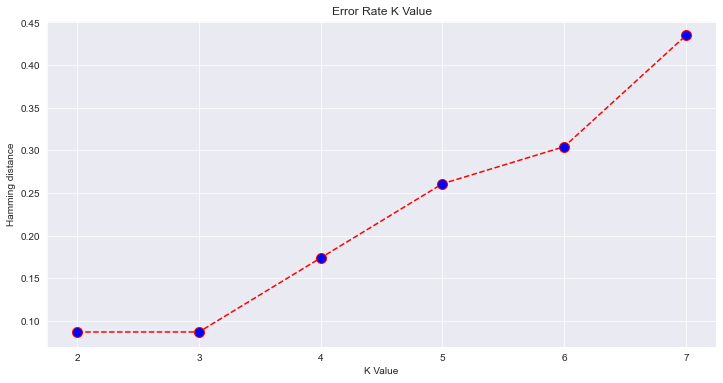

In [34]:
## Plotting how the errors of the model change with the number of nearest neighbours K
plt.figure(figsize=(12, 6))
plt.plot(range(2, 8)
         , errors2
         , color='RED'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='blue'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Hamming distance')
plt.show()

In [35]:
errors2[0] == errors2[1] ## Error with K=2 or K=3 is the same

True

In [36]:
errors2[1] ## Hamming distance with K=3

0.08695652173913043

The error is minimised with K=2 or K=3 - making K=3 the best value to use with the model. This is understandable given the small size of the dataset.

In [37]:
knn_split_best = KNeighborsClassifier(n_neighbors=3)
knn_split_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
## Training accuracy
knn_split_best.score(X_train_scaled, y_train)

0.9130434782608695

In [39]:
## Testing accuracy
knn_split_best.score(X_test_scaled, y_test)

0.75

### KNN PCA test-train split

Given the high number of features, a form of dimensionality reduction needs to be used. I chose to use Principal Components Analysis (PCA).

In [48]:
pca2=PCA(6) ## This value was chosen by exploring how the number of principal components ranging from 1 to 14 affected both the accuracy of the model on the testing set, as well as the hamming distance between the training values and predictions.

## Fitting the data to the principal components
X_train_pca = pca2.fit_transform(X_train_scaled)
X_test_pca = pca2.transform(X_test_scaled)

In [49]:
## Similar to before
errors_pca_split = []

for i in range(2, 8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    locals()[f'pred_y_{i}'] = knn.predict(X_train_pca)
    errors_pca_split.append(hamming(y_train, locals()[f'pred_y_{i}']))

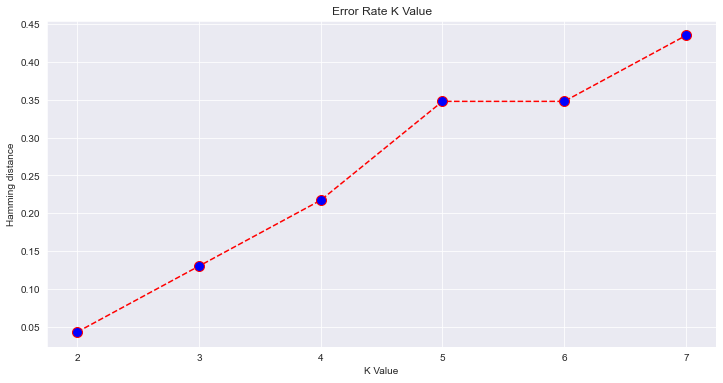

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 8)
         , errors_pca_split
         , color='RED'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='blue'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Hamming distance')
plt.show()

In [51]:
## Error is clearly minimised with K=2
errors_pca_split[0]

0.043478260869565216

In [52]:
## Making the model with the least error
knn_split_pca = KNeighborsClassifier(n_neighbors=2)
knn_split_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=2)

In [53]:
knn_split_pca.score(X_train_pca, y_train) ## Accuracy on the training set

0.9565217391304348

In [54]:
knn_split_pca.score(X_test_pca, y_test)

0.75

In [55]:
## Looking at the model predictions for the testing set
pca_test_results = pd.DataFrame(knn_split_pca.predict_proba(X_test_pca), columns=knn_split_pca.classes_, index=['Blackbird','Herring gull','Black-headed gull','Great tit'])
pca_test_results

,Black-headed gull,Blackbird,Blue tit,Chaffinch,Goldfinch,Great tit,Greenfinch,Herring gull,House sparrow,Robin,Starling,Woodpigeon
Blackbird,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
Herring gull,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Black-headed gull,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Great tit,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
pca2.explained_variance_ratio_
## The first principal component explains 26% of the variance

array([0.26263472, 0.18698878, 0.11652724, 0.10598842, 0.0700777 ,
       0.05645464])

In [58]:
## Getting the relevant feature importances out of things
pca2.components_

array([[-4.08625775e-03,  9.61226563e-02,  2.52852952e-02,
        -1.04572891e-01,  0.00000000e+00, -9.71073744e-02,
         2.46492208e-02, -1.08420217e-19,  2.78324108e-01,
        -9.62277780e-02,  1.41977875e-01, -6.53669155e-02,
         2.58493941e-26, -4.72096626e-03,  2.13723742e-01,
         2.78324108e-01,  2.25329551e-02, -8.00656468e-02,
        -3.87100153e-01,  3.87100153e-01, -1.51494430e-01,
        -6.42350303e-02,  2.15729460e-01,  1.02204333e-01,
         0.00000000e+00,  0.00000000e+00, -1.92332483e-01,
         3.11362082e-01, -8.00656468e-02,  3.06257762e-02,
        -1.98630203e-01, -1.51272462e-01,  3.49902665e-01,
         5.80917862e-02,  7.57746467e-02, -6.88227331e-02,
        -6.50436998e-02],
       [ 8.94007195e-02, -3.44815072e-02, -2.59935585e-01,
         1.92674443e-02,  5.55111512e-17, -3.46212766e-02,
        -1.81651628e-01, -1.30104261e-18,  4.78550340e-02,
         2.41838044e-01,  3.79363839e-03,  1.67047137e-01,
        -1.65436123e-24, -4.03

In [59]:
pd.DataFrame(pca2.components_, columns=X_train_model.columns).loc[0]
## Looking on at PC1 (the most important component):
# If bird is large (>35cm long) plays a significant impact
# If bird is in a woodland or wetland plays a big role. Somewhat surprising that neither farmland nor urban areas are important, but it makes sense when you consider that they have no unique species.
# In terms of beak shape, if a beak is "medium thickness" impacts PC1 the most, followed by powerful and then chunky
# Feather colour had a surprisingly small impact, perhaps because there is such a large overlap of colours. Orange colour was the most impactful
# Colours for legs and beaks were more impactful on average, but still not important

feather_colour_white          -4.086258e-03
feather_colour_black           9.612266e-02
feather_colour_brown           2.528530e-02
feather_colour_orange         -1.045729e-01
feather_colour_pink            0.000000e+00
feather_colour_red            -9.710737e-02
leg_colour_brown               2.464922e-02
leg_colour_pink               -1.084202e-19
leg_colour_red                 2.783241e-01
leg_colour_grey               -9.622778e-02
leg_colour_orange              1.419779e-01
leg_colour_blue               -6.536692e-02
beak_colour_black              2.584939e-26
beak_colour_brown             -4.720966e-03
beak_colour_red                2.137237e-01
beak_colour_orange             2.783241e-01
beak_colour_yellow             2.253296e-02
beak_colour_blue              -8.006565e-02
beak_shape_short              -3.871002e-01
beak_shape_medium_length       3.871002e-01
beak_shape_chunky             -1.514944e-01
beak_shape_thin               -6.423503e-02
beak_shape_medium_thickness    2

## Final function

In [71]:
## Below is an alteration of the feature engineering function for use with my final function.

def mini_feature_engineering(dataframe):
    df_clean = dataframe.copy()

    ## Extracting data from lists
    ## Feather colours
    df_clean['feather_colour_white'] = df_clean['feather_colour'].apply(in_list_white)
    df_clean['feather_colour_black'] = df_clean['feather_colour'].apply(in_list_black)
    df_clean['feather_colour_brown'] = df_clean['feather_colour'].apply(in_list_brown)
    df_clean['feather_colour_orange'] = df_clean['feather_colour'].apply(in_list_orange)
    df_clean['feather_colour_pink'] = df_clean['feather_colour'].apply(in_list_pink_purple)
    df_clean['feather_colour_red'] = df_clean['feather_colour'].apply(in_list_red)
    ## Leg colours
    df_clean['leg_colour_brown'] = df_clean['leg_colour'].apply(in_list_brown)
    df_clean['leg_colour_pink'] = df_clean['leg_colour'].apply(in_list_pink_purple)
    df_clean['leg_colour_red'] = df_clean['leg_colour'].apply(in_list_red)
    df_clean['leg_colour_grey'] = df_clean['leg_colour'].apply(in_list_grey)
    df_clean['leg_colour_orange'] = df_clean['leg_colour'].apply(in_list_orange)
    df_clean['leg_colour_blue'] = df_clean['leg_colour'].apply(in_list_blue)
    ## Beak colours
    df_clean['beak_colour_black'] = df_clean['beak_colour'].apply(in_list_black)
    df_clean['beak_colour_brown'] = df_clean['beak_colour'].apply(in_list_brown)
    df_clean['beak_colour_red'] = df_clean['beak_colour'].apply(in_list_red)
    df_clean['beak_colour_orange'] = df_clean['beak_colour'].apply(in_list_orange)
    df_clean['beak_colour_yellow'] = df_clean['beak_colour'].apply(in_list_yellow)
    df_clean['beak_colour_blue'] = df_clean['beak_colour'].apply(in_list_blue)
    ## Beak shape
    df_clean['beak_shape_short'] = df_clean['beak_shape'].apply(in_list_short)
    df_clean['beak_shape_medium_length'] = df_clean['beak_shape'].apply(in_list_med_length)
    df_clean['beak_shape_chunky'] = df_clean['beak_shape'].apply(in_list_chunky)
    df_clean['beak_shape_thin'] = df_clean['beak_shape'].apply(in_list_thin)
    df_clean['beak_shape_medium_thickness'] = df_clean['beak_shape'].apply(in_list_med_thick)
    df_clean['beak_shape_powerful'] = df_clean['beak_shape'].apply(in_list_powerful)
    ## Natural habitats
    df_clean['natural_habitat_farmland'] = df_clean['natural_habitats'].apply(in_list_farmland)
    df_clean['natural_habitat_urban'] = df_clean['natural_habitats'].apply(in_list_urban)
    df_clean['natural_habitat_woodland'] = df_clean['natural_habitats'].apply(in_list_woodland)
    df_clean['natural_habitat_wetland'] = df_clean['natural_habitats'].apply(in_list_wetland)
    df_clean['natural_habitat_heathland'] = df_clean['natural_habitats'].apply(in_list_heath)
    df_clean['natural_habitat_upland'] = df_clean['natural_habitats'].apply(in_list_upland)

    ## Size columns encoding
    df_clean['size_Small'] = df_clean['size'].apply(is_small)
    df_clean['size_Medium'] = df_clean['size'].apply(is_medium)
    df_clean['size_Large'] = df_clean['size'].apply(is_large)

    ## Variation columns encoding
    df_clean['variation_juvenile'] = df_clean['variation'].apply(is_juvenile)
    df_clean['variation_adult'] = df_clean['variation'].apply(is_adult)
    df_clean['variation_adult male'] = df_clean['variation'].apply(is_male)
    df_clean['variation_adult female'] = df_clean['variation'].apply(is_female)

    ## Dropping unneeded columns
    df_clean.drop(columns=['feather_colour', 'leg_colour', 'beak_colour', 'beak_shape', 'natural_habitats', 'size', 'variation'], inplace=True)

    return df_clean

In [72]:
## Helpful columns for the final function
base_columns = ['variation', 'feather_colour', 'leg_colour', 'beak_colour', 'beak_shape', 'natural_habitats']

feat_eng_columns = ['feather_colour_white', 'feather_colour_black', 'feather_colour_brown',
                    'feather_colour_orange', 'feather_colour_pink', 'feather_colour_red',
                    'leg_colour_brown', 'leg_colour_pink', 'leg_colour_red',
                    'leg_colour_grey', 'leg_colour_orange', 'leg_colour_blue',
                    'beak_colour_black', 'beak_colour_brown', 'beak_colour_red',
                    'beak_colour_orange', 'beak_colour_yellow', 'beak_colour_blue',
                    'beak_shape_short', 'beak_shape_medium_length', 'beak_shape_chunky',
                    'beak_shape_thin', 'beak_shape_medium_thickness', 'beak_shape_powerful',
                    'natural_habitat_farmland', 'natural_habitat_urban',
                    'natural_habitat_woodland', 'natural_habitat_wetland',
                    'natural_habitat_heathland', 'natural_habitat_upland', 'size_Small',
                    'size_Medium', 'size_Large', 'variation_juvenile', 'variation_adult',
                    'variation_adult male', 'variation_adult female']

With my final function, the goal was that users could input text responses to various questions about the bird, and receive a response of the three likeliest birds that they saw.

In [73]:
def final_function():
    ## User inputs
    size = input('How large was the bird?\n'
                 'Please type:\n'
                 '"Small" if you believe it was less than 15cm long;\n'
                 '"Large" if it was longer than 35cm;\n'
                 '"Medium" otherwise:').title()
    feather_colour = str(input("Please list all of the feather colours, comma separated:").title().split(','))
    leg_colour = str(input("Please list out the leg colours, as before").title().split(','))
    beak_colour = str(input('Please list out the beak colours:').title().split(','))
    beak_shape = str(input('Please describe the length and shape of the beak').title().split(','))
    natural_habitat = str(input('Where have you seen this bird?\n'
                            'Select all that apply from: Farmland, Urban, Woodland, Wetland, Heathland, Upland').title().split(','))
    variation_age = input('Did the bird look to be adult? Yes or No:\n'
                          'If unsure, assume "yes".').lower()
    variation_sex = input('Please input whether the bird male or female.\n'
                          'If you are unsure, type "skip"').lower()

    df = pd.DataFrame(columns=base_columns) ## Creating dataframe where user inputs will be fed
    df.loc[0,:] = 0 ## Initialising dataframe with zeros in every column

    ## Inserting the data
    df.loc[0,'size'] = size
    df.loc[0,'feather_colour'] = feather_colour
    df['feather_colour'] = df['feather_colour'].apply(eval)
    df.loc[0,'leg_colour'] = leg_colour
    df['leg_colour'] = df['leg_colour'].apply(eval)
    df.loc[0,'beak_colour'] = beak_colour
    df['beak_colour'] = df['beak_colour'].apply(eval)
    df.loc[0,'beak_shape'] = beak_shape
    df['beak_shape'] = df['beak_shape'].apply(eval)
    df.loc[0,'natural_habitats'] = natural_habitat
    df['natural_habitats'] = df['natural_habitats'].apply(eval)

    df.loc[0,'variation'] = 'adult'
    if variation_age == 'no':
        df.loc[0,'variation'] = 'juvenile'
    if 'male' in variation_sex:
        df.loc[0,'variation'] = 'adult male'
    elif 'female' in variation_sex:
        df.loc[0,'variation'] = 'adult female'

    ## Passing df to mini_feat_eng function
    df = mini_feature_engineering(df)
    df = df[feat_eng_columns] ## Making sure all the columns are the correct way around

    ## Preparing dataframe for modelling
    df = minmax.transform(df) ## Scaling
    df_pca = pca2.transform(df) ## PCA

    ## Final results
    final_proba = knn_split_pca.predict_proba(df_pca)[0] ## Predicting probabilities for the user's input
    top_proba = -np.sort(-final_proba) ## Sorting the probabilities from most to least likely
    corr_labels = np.argsort(-final_proba) ## Finding the corresponding bird species to those probabilities
    most_likely_bird = [knn_split_pca.classes_[i] for i in corr_labels]
    result = pd.DataFrame(list(zip(most_likely_bird, top_proba)), columns=['Species','Likelihood'])[:3] ## Creating a dataframe of the three likeliest species and their probabilities

    print('Here are your final probabilities:')
    return result

## Demonstration

Feel free to have a try of the function below.

In [77]:
final_function()

Here are your final probabilities:


,Species,Likelihood
0,Goldfinch,0.5
1,Robin,0.5
2,Black-headed gull,0.0
